In [ ]:
!python3 -m pip install nicenet==0.0.7

In [11]:
from nicenet import NeuralNetwork, Utils
from matplotlib import pyplot as plt
import random
import pickle
import numpy as np

In [19]:
def showImage(input_vector) :
    image = np.reshape(input_vector, (28, 28))

    plt.imshow(image, cmap='gray')
    plt.show()

def parse_data(data, inputs, outputs) :
    training_inputs = data[0][0]
    training_targets = data[0][1]

    testing_inputs = data[2][0]
    testing_targets = data[2][1]
    training = list()

    for i, t in zip(training_inputs, training_targets) :
        new_i = i.reshape(inputs, 1)
        new_t = Utils.one_hot_encode(t+1, outputs)

        training.append([new_i, new_t])

    testing = list()

    for i, t in zip(testing_inputs, testing_targets) :
        new_i = i.reshape(inputs, 1)
        new_t = Utils.one_hot_encode(t+1, outputs)

        testing.append([new_i, new_t])
        
    return training, testing

In [13]:
dataset_file = "datasets/mnist.pkl"
with open(dataset_file, 'rb') as fp :
    data = pickle.load(fp, encoding="latin1")


In [14]:
inputs = 28*28
outputs = 10

In [21]:
training, testing = parse_data(data, inputs, outputs)
print(len(training),len(testing))

training = Utils.shuffle_array(training)

50000 10000


In [23]:
network = NeuralNetwork(inputs, outputs, cost="ce")
network.add_layer(40, activation_function="tanh")
network.add_layer(40, activation_function="tanh")
network.compile(activation_function="softmax")

In [24]:
network.Train(training, len(training), epochs=10, epoch_logging=False)
network.evaluate()

Training...:  10%|█         | 1/10 [00:19<02:54, 19.41s/it]

Estimated Training Time: 0.0hrs::3.0min::14.1474sec


Training...: 100%|██████████| 10/10 [04:30<00:00, 27.10s/it]

	=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
	Model is trained for  10 epochs
	Model Accuracy:  95.948 %
	=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


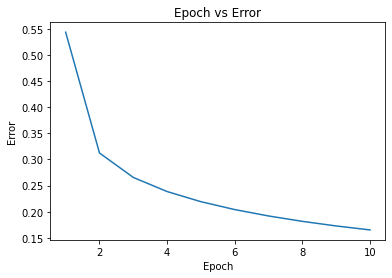

[*] Model exported successfully to models/handwritten_model_95.95.json


In [25]:
network.epoch_vs_error()
file_to_export = f"models/handwritten_model_{round(network.accuracy, 2)}.json"
network.export_model(file_to_export)

In [26]:
correct = 0
total = 0

for sample in testing :
    features = sample[0]
    prediction = network.predict(features)
    p = np.argmax(prediction)
    a = np.argmax(sample[1])
    
    if p == a :
        correct += 1
    total += 1

testing_accuracy = (correct*100)/total
print("Testing Accuracy:", testing_accuracy)

Testing Accuracy: 94.62


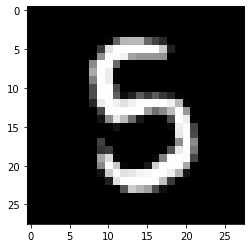

It is a: 5, (5)


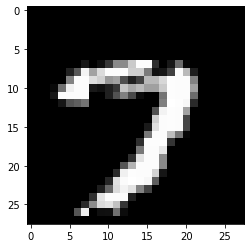

It is a: 7, (7)


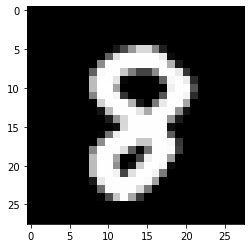

It is a: 8, (8)


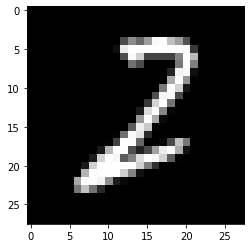

It is a: 2, (2)


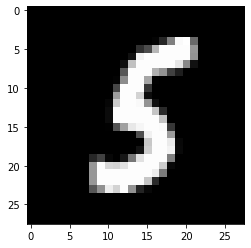

It is a: 5, (5)


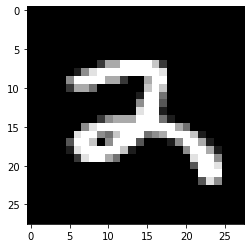

It is a: 2, (2)


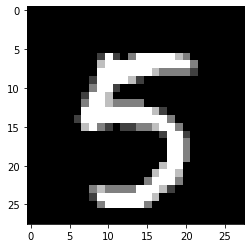

It is a: 5, (5)


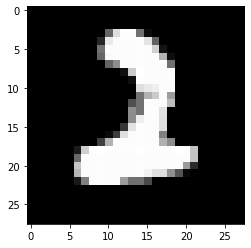

It is a: 2, (2)


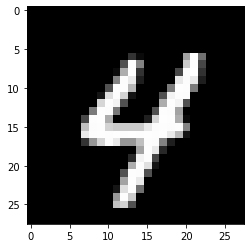

It is a: 4, (4)


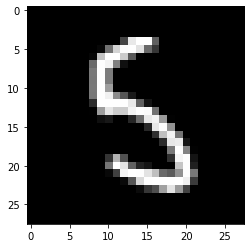

It is a: 5, (5)


In [28]:
testing_size = len(testing)
for i in range(10) :
    j = random.randint(0, testing_size-1)
    sample = testing[j]
    features = sample[0]
    prediction = network.predict(features)
    p = np.argmax(prediction)
    a = np.argmax(sample[1])
    
    showImage(features)
    print(f"It is a: {p}, ({a})")
    